![Sleep Health and Lifestyle Banner](banner_image.png)

# Sleep Health and Lifestyle

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

### 🌎 **Some guiding questions to help you explore this data:**

1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

### 📊 **Visualization ideas**
- Boxplot: show the distribution of sleep duration or quality of sleep for each occupation.
- Show the link between age and sleep duration with a scatterplot. Consider including information on the sleep disorder.

### 🔍 **Scenario: Automatically identify potential sleep disorders**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a health insurance company and are tasked to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective**: Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

Check out our [Linear Classifiers course](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) (Python) or [Supervised Learning course](https://app.datacamp.com/learn/courses/supervised-learning-in-r-classification) (R) for a quick introduction to building classifiers.


# Project Scope:
* Explore the data; looking for features that impact the likelihood of having a sleep disorder
* Per the scenario above, create a classification model to predict if a client might have a sleep disorder.
* Use pipelines and the TPOT autoML library

In [1]:
SELECT *
FROM 'data.csv'
LIMIT 10

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [2]:
import pandas as pd
import numpy as np

sleep_data = pd.read_csv('data.csv')
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Notes: No nulls! Dtypes make sense too. Next some descriptive statistics.

In [4]:
sleep_data.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


Nothing jumping out here. Looks like pretty well behaved data. Now I will split my analysis into numeric and categorical features

In [5]:
person_id = sleep_data.pop('Person ID')
cat_cols = sleep_data.drop('Sleep Disorder', axis=1).select_dtypes(include='object').columns
num_cols = sleep_data.select_dtypes(include=np.number).columns

## Numerical Features

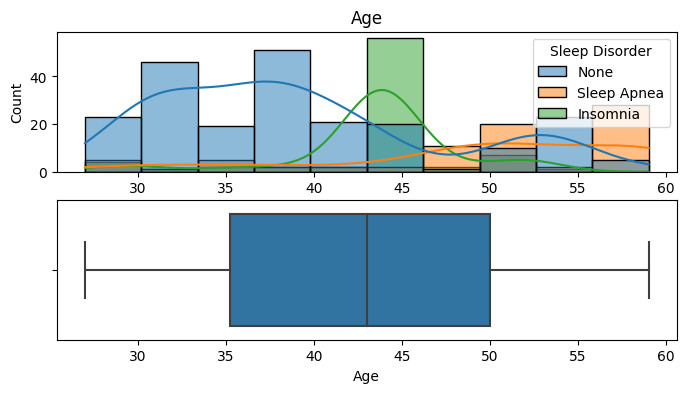

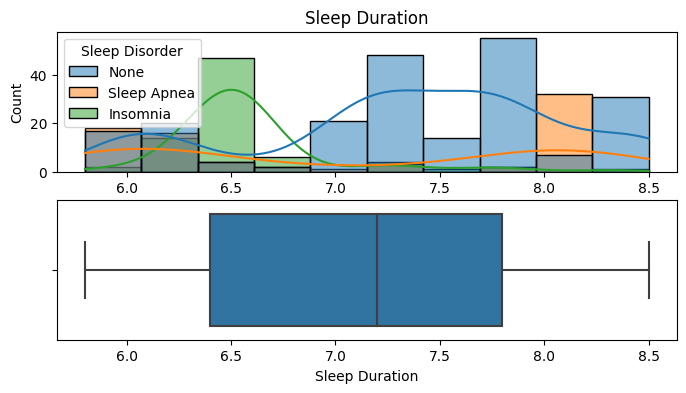

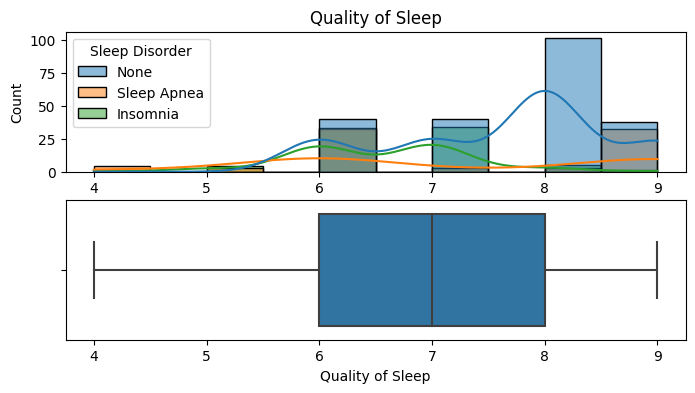

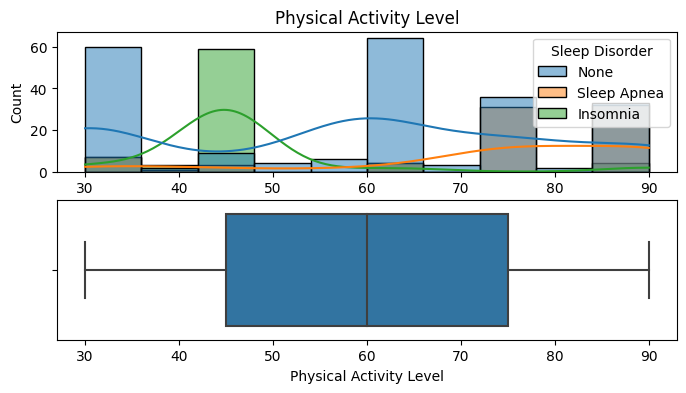

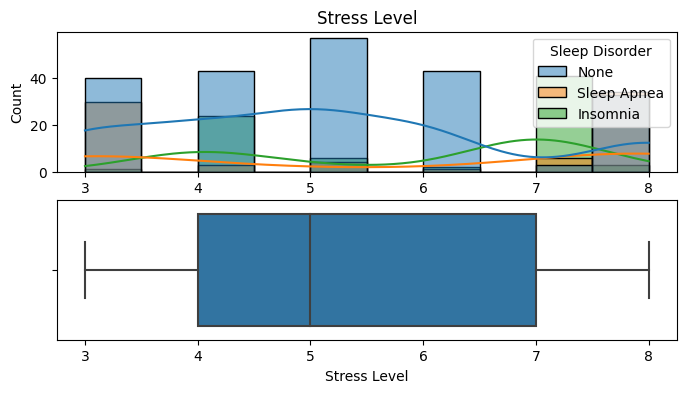

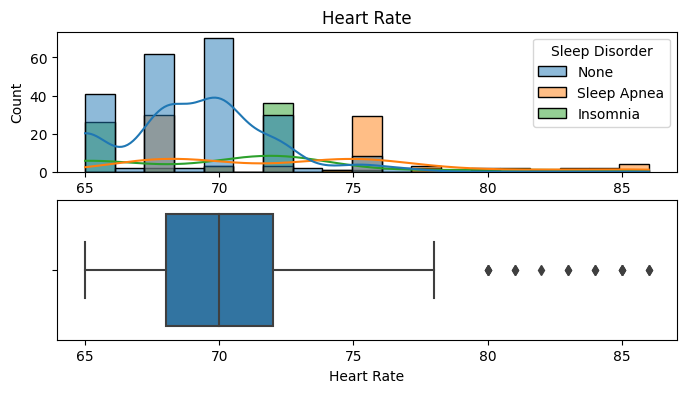

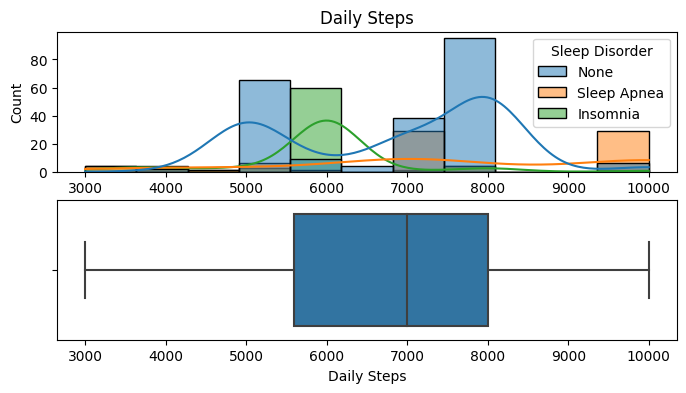

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

for  col in num_cols:
    fig, axs = plt.subplots(2, 1, figsize=(8, 4))
    sns.boxplot(data=sleep_data[[col, 'Sleep Disorder']], x=col, ax=axs[1])
    sns.histplot(data=sleep_data[[col, 'Sleep Disorder']], x=col, hue='Sleep Disorder', kde=True, alpha=0.5, ax=axs[0])
    axs[0].set_title(col,loc='center')
    plt.show()

Notes: Several of the features split out based on `Sleep Disorder`. This indicates these features will be useful in predicting the sleep disorder outcome. `Heart Rate` appears to have some outliers.

Next let's look at the correlation of the numeric features with eachother using a heatmap.

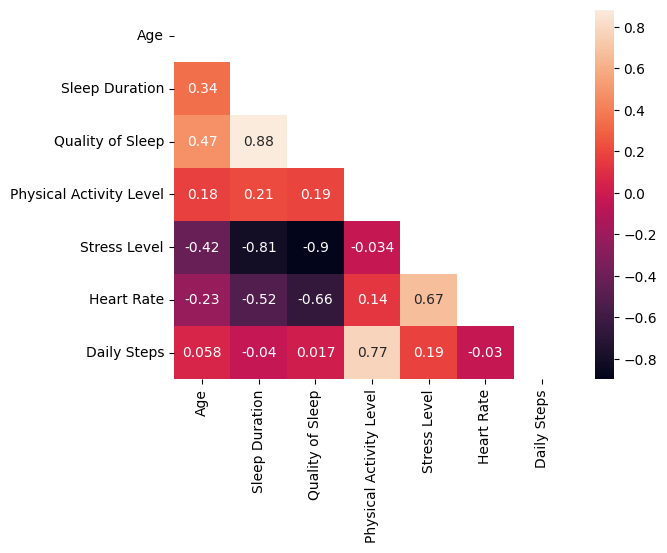

In [128]:
corr = sleep_data[num_cols].corr()
matrix = np.triu(corr) #this is used as a mask to just show the bottom half of heatmap. Top half is redundant.
sns.heatmap(corr, annot=True, mask=matrix);

Notes: A few of the features are highly correlated. `Stress Level` vs `Quality of Sleep` and `Quality of Sleep` vs `Sleep Duration` in particular.

Before moving onto the categorical features, I will make a pairplot of the numerical features to check for non-linear correlations 

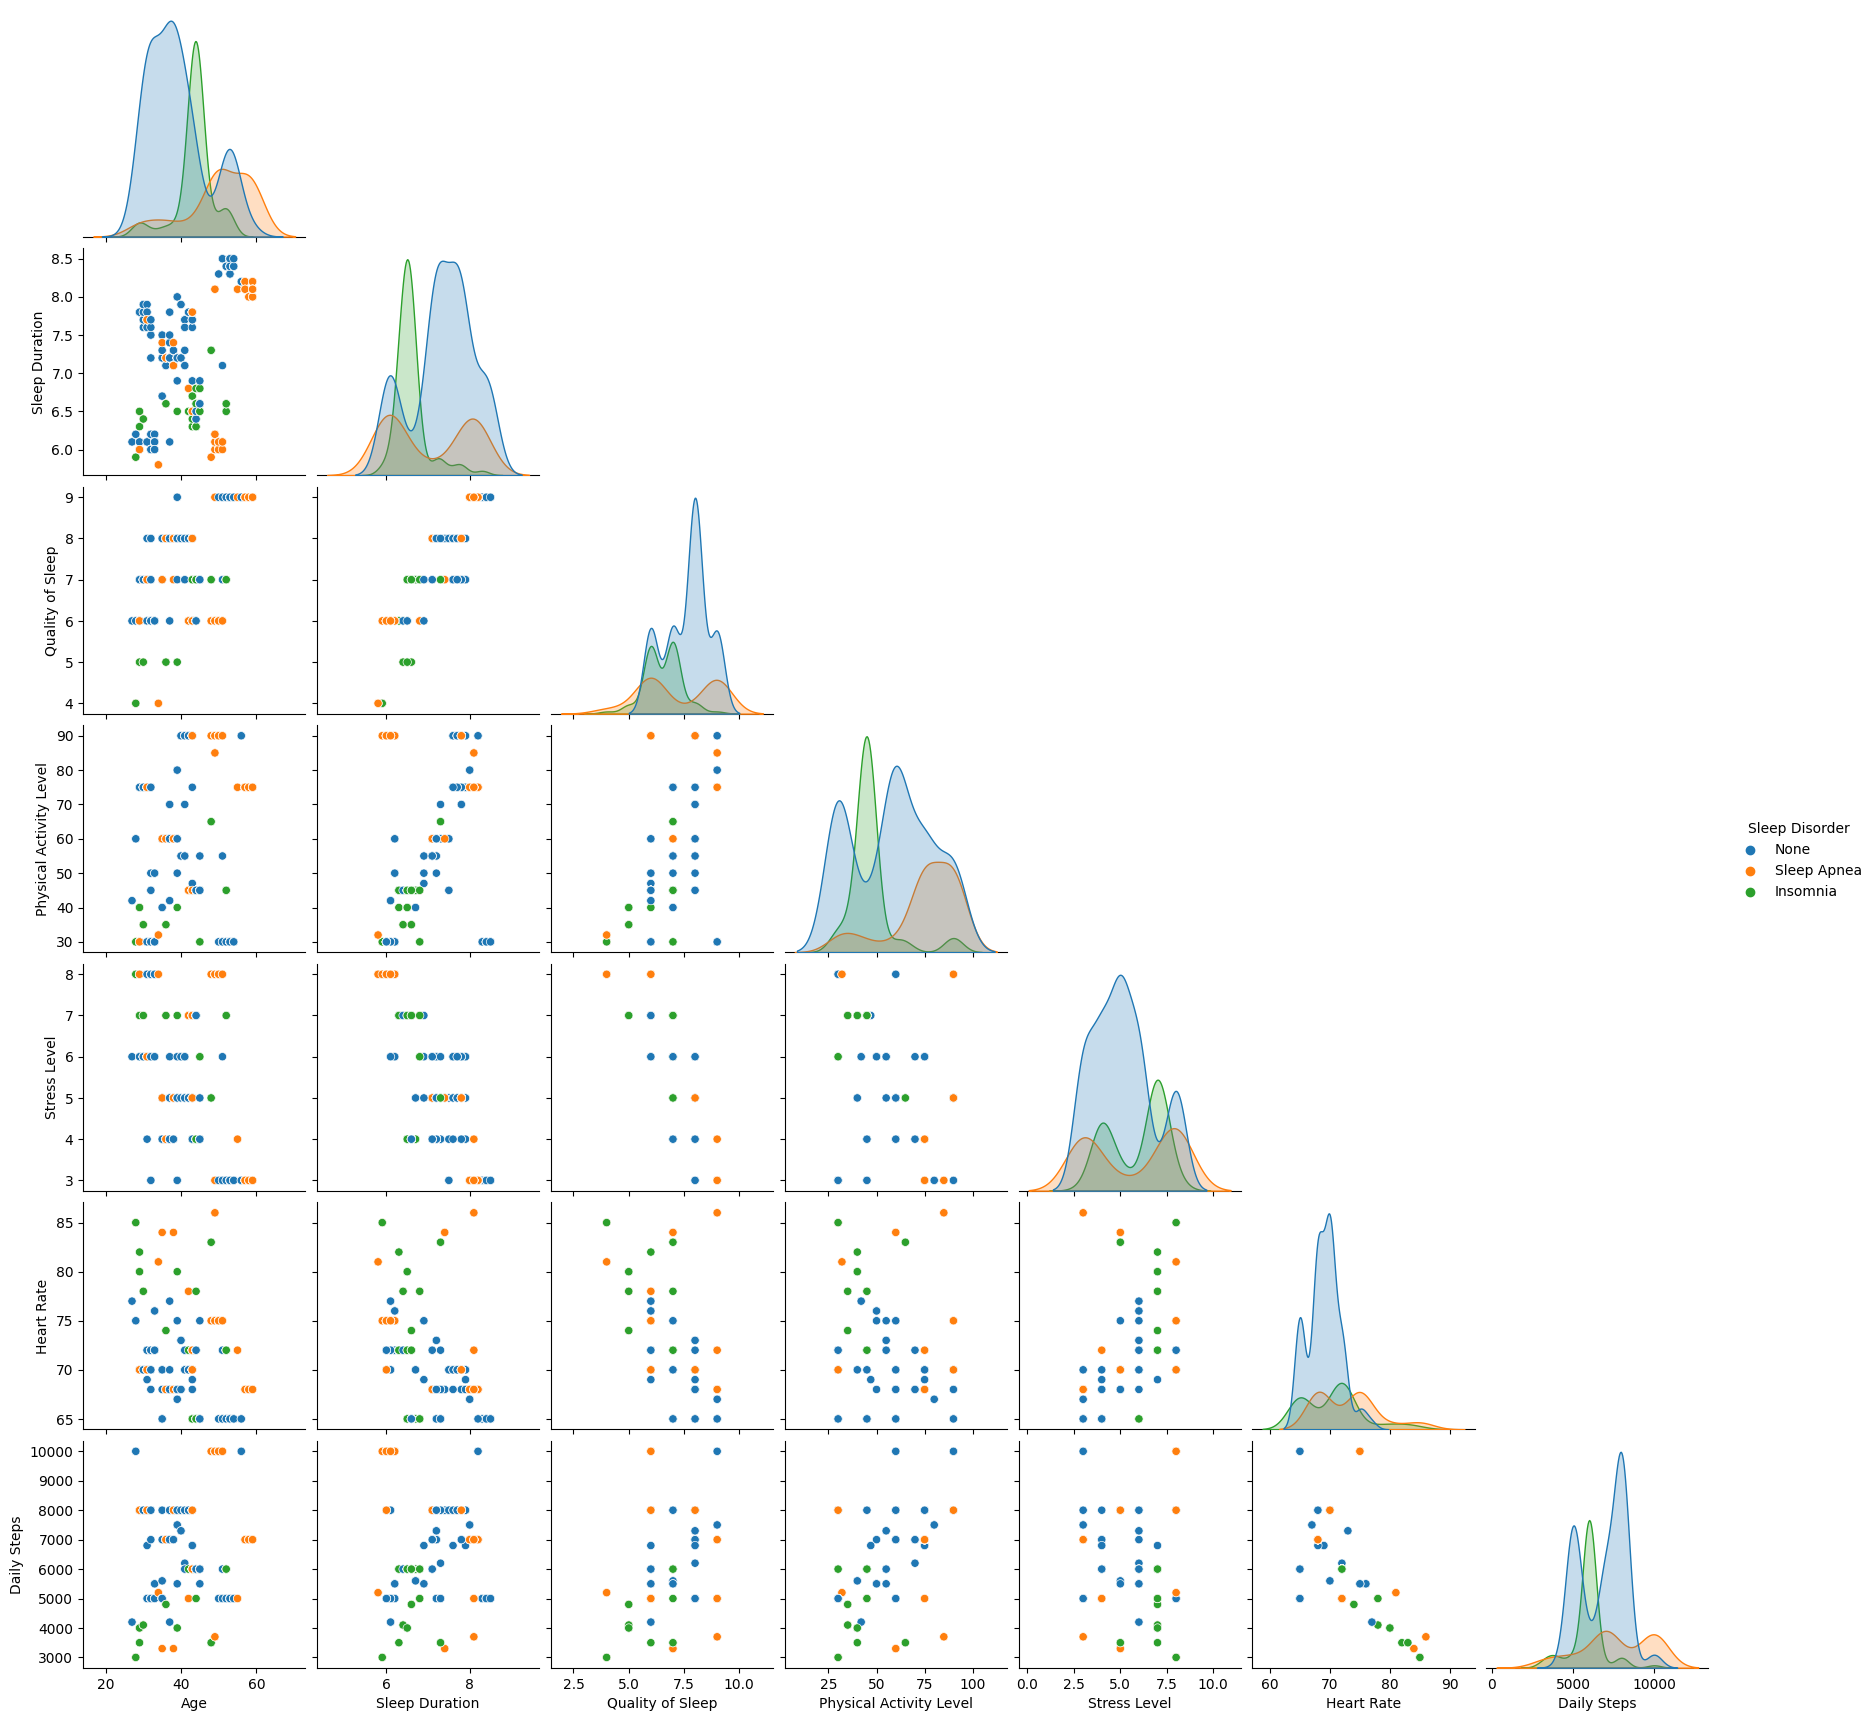

In [55]:
sns.pairplot(data=sleep_data, hue='Sleep Disorder', corner=True);

Notes: `Sleep Duration` and `Age` seem to have an interesting, potentially non-linear correlation.

## Categorical Features

I will use stacked barcharts, seperated by the `Sleep Disorder` outcome to explore the categorical features.

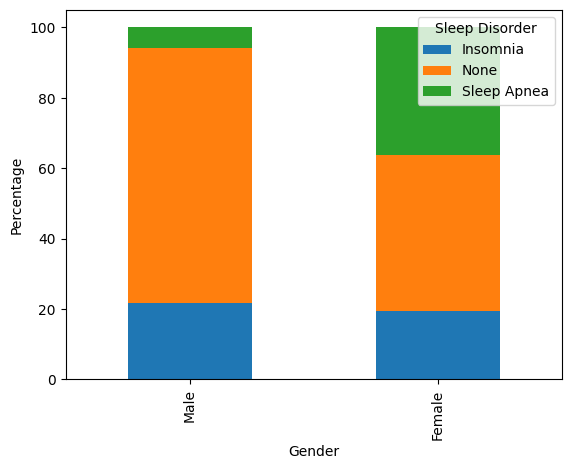

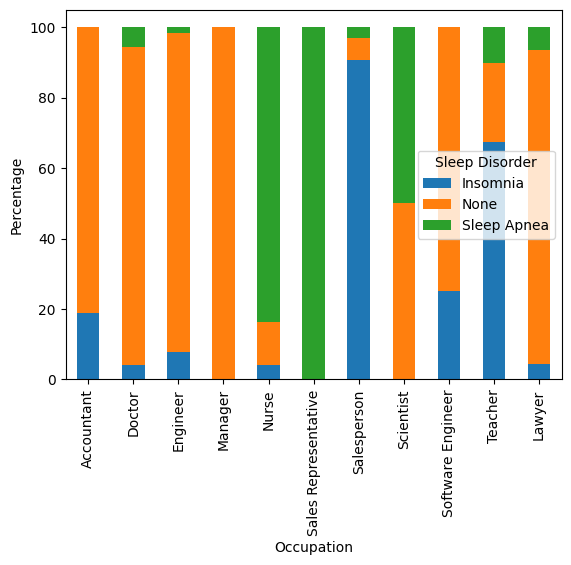

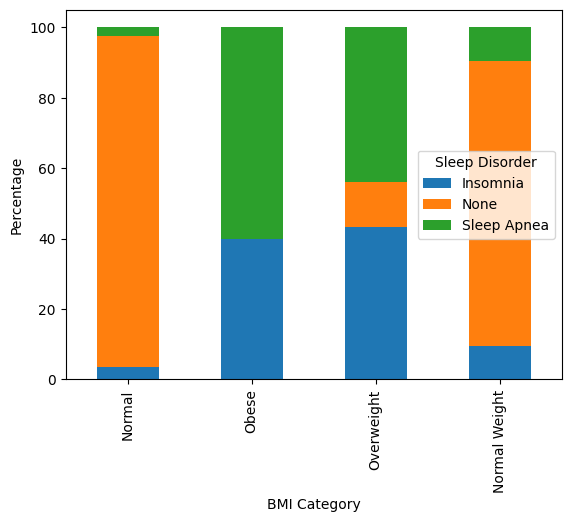

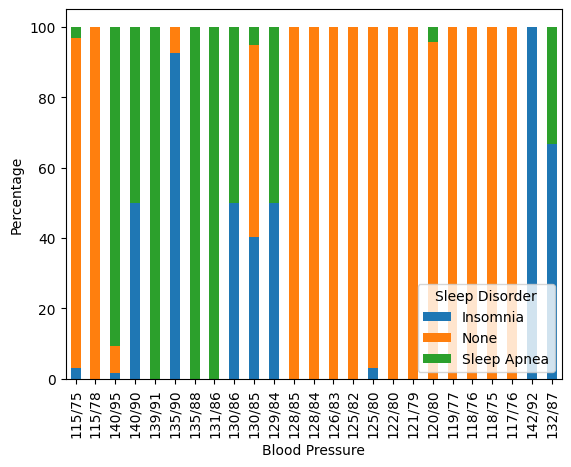

In [135]:
for col in cat_cols:
    cross_tab = pd.crosstab(sleep_data[col], sleep_data['Sleep Disorder'], normalize='index') * 100
    cross_tab = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index]
    cross_tab.plot(kind='bar', stacked=True)
    plt.ylabel('Percentage')
    plt.yticks()
    plt.show()

Notes: All of features split out in meaningful ways across the `Sleep Disorder` outcome. There seems to be an increase in percentage of `Sleep Apnea` for female respondents. 

The `Salesperson` `Occupation` has a very high percentage of `Insomnia` sleep disorders. `Nurses` and `Sales Representative` seem very prone to `Sleep Apnea`.

`Obese` and `Overweight` respondents have an increase in both `Insomnia` and `Sleep Apnea`. It might be possible to combine the `Normal` and `Normal Weight` categories, based on their distribution of outcomes.

Finally, `Blood Pressure` seems closely connected as well, with some blood pressure readings containing almost no sleep disorders and others containing mostly sleep disorders. 

## Splitting features and target

In [90]:
X = sleep_data.drop(columns='Sleep Disorder')
y = sleep_data[['Sleep Disorder']]

In [91]:
sleep_data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Pipelines
I will use a workflow of pipelines to transform the features and get them ready to model. There will be two pipelines; one for the numeric features and the other for the categorical features explored above. This approach is heavily inspired by this excellent Kaggle [notebook](https://www.kaggle.com/code/kacperrabczewski/horse-health-a-beginner-friendly-guide)

In [92]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, accuracy_score

numerical_pipeline = make_pipeline(
    QuantileTransformer(output_distribution='normal', random_state=0), #transforms features to make distributions as normal as possible
    StandardScaler() #scales the features to have a mean of 0 and std of 1. This helps some types of models perform better. It is best to do this as the last step of the transformation. 
)

categorical_pipeline = make_pipeline(
    OrdinalEncoder() #This treats categorical variables as ordered. At least some in our dataset appear to be, so we will use this. It might also be worth trying other encoding methods to see what has the best results. Pipelines make it easy to quickly try a variety of transformations!
)

transformer = make_column_transformer(
    (
        numerical_pipeline,
        make_column_selector(dtype_include=np.number) #selects the numeric columns for the numeric pipeline
    ),
    (
        categorical_pipeline,
        make_column_selector(dtype_include=object) #selects the object columns for the categorical pipeline
    ),
    remainder='passthrough', #this catches any columns not captured in the previous pipelines. Is not necessary for this dataset by nice to have there in general.
    verbose_feature_names_out=False
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('quantiletransformer',
                                                  QuantileTransformer(output_distribution='normal',
                                                                      random_state=0)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa51f74d1c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa51f74de20>)],
                  verbose_feature_names_out=False)

In [93]:
target_encoder = OrdinalEncoder(categories=[['None', 'Insomnia', 'Sleep Apnea']])

In [94]:
X_train = transformer.fit_transform(X)
y_train = target_encoder.fit_transform(y).ravel()

In [97]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size=0.9)

## TOPT
Let's us the tpot classifier to help us select and tune our model. [TPOT](https://github.com/EpistasisLab/tpot/) is a very interesting AutoML library that uses genetic programming.

In [99]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(
                                    generations=10, 
                                    population_size=250, 
                                    cv=5,
                                    random_state=0, 
                                    verbosity=2,
                                    scoring='f1_micro',
                                    warm_start=True, #this allows us to run the fit multiple times
                                    )

Notes: Since I am using a `population_size=250` this will take a while to run!

In [100]:
#Results of fit Best pipeline: GradientBoostingClassifier(RFE(LogisticRegression(RFE(input_matrix, criterion=gini, max_features=0.4, n_estimators=100, step=0.9500000000000001), C=0.0001, dual=False, penalty=l2), criterion=entropy, max_features=0.25, n_estimators=100, step=0.7000000000000001), learning_rate=0.1, max_depth=2, max_features=0.2, min_samples_leaf=5, min_samples_split=18, n_estimators=100, subsample=1.0)
#Score 0.9313871817383669
pipeline_optimizer.fit(X_train, y_train);

Version 0.11.7 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/2750 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9224758560140474

Generation 2 - Current best internal CV score: 0.9254609306409132

Generation 3 - Current best internal CV score: 0.9284460052677787

Generation 4 - Current best internal CV score: 0.9284460052677787

Generation 5 - Current best internal CV score: 0.9284460052677787

Generation 6 - Current best internal CV score: 0.9284460052677787

Generation 7 - Current best internal CV score: 0.9284460052677787

Generation 8 - Current best internal CV score: 0.9313871817383669

Generation 9 - Current best internal CV score: 0.9313871817383669

Generation 10 - Current best internal CV score: 0.9313871817383669

Best pipeline: GradientBoostingClassifier(RFE(LogisticRegression(RFE(input_matrix, criterion=gini, max_features=0.4, n_estimators=100, step=0.9500000000000001), C=0.0001, dual=False, penalty=l2), criterion=entropy, max_features=0.25, n_estimators=100, step=0.7000000000000001), learning_rate=0.1, max_depth=2, max_features=0.2, 

Note: The F1 CV score of our best pipeline is a solid ~`0.93` .Since the `warm_start=True` we could run this multiple times. I intentionally set the population high though to hopefully get good results the first time. TPOT found a GradientBoostingClassifier as the best estimator for our model. We could take the best model TPOT found then fine-tune it further to perhaps increase the model effectiveness, but that is outside the score of this project.

## Model validation and inference

In [113]:
from sklearn.metrics import f1_score, accuracy_score
best_pipeline = pipeline_optimizer.fitted_pipeline_
y_pred = best_pipeline.predict(X_val)
score_f1 = f1_score(y_val, y_pred, average='micro')
score_accuracy = accuracy_score(y_val, y_pred)

print(f"f1 score:{score_f1} | accuracy:{100*score_accuracy:.2F}%")

f1 score:0.868421052631579 | accuracy:86.84%


Our model predicts the correct sleep disorder with an accuracy of `86.84`% on our validation set. This is certainly not bad for an intial attempt. There is almost always room for improvement, but for this project I will stick with these results.

Finally, if the insurance company needed percentage likelihood of each sleep disorder to get a more fine-grained look at potential clients, we could output the predicted probabilites instead as below.

In [127]:
y_pred_prob = best_pipeline.predict_proba(X_val)
y_pred_prob[0:5]

array([[0.95570463, 0.03400417, 0.0102912 ],
       [0.06388272, 0.03032119, 0.90579609],
       [0.06387577, 0.92201245, 0.01411178],
       [0.81422982, 0.14424563, 0.04152455],
       [0.88023029, 0.10980652, 0.00996318]])